<a id="1"></a>
# <div style="padding: 20px; color: cyan; margin: 0; font-size: 30px; font-family: Arial; text-align: left; border-radius: 5px; background-color: #000000; border: 2px solid blue;"><b>Exploratory data analysis</b></div>

<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Import</b>

In [189]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf

print('Setup complete!')

Setup complete!


<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Exploring </b> data

In [190]:
cleaned_df = pd.read_csv('../data/processed/processed_data.csv')

In [191]:
cleaned_df = cleaned_df.drop_duplicates(subset='name')
cleaned_df.head(2)

,name,description,designer,artist,publisher,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,type,category,mechanism,family,year,average_rating
0,Samurai,Dispute the favor of three different castes in...,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück + 15 more",2,4,30,60,45,10,2.47,16000,4000,Strategy,Abstract Strategy,Area Majority / Influence,Components: Map (Continental / National scale)...,1998,7.5
12,Die Macher,Players represent political parties attempting...,Karl-Heinz Schmiel,"Bernd Brunnhofer, Marcus Gschwendtner, Harald ...","Hans im Glück, Moskito Spiele + 7 more",3,5,240,240,240,14,4.31,5700,2100,Strategy,Economic,Alliances,"Country: Germany, Digital Implementations: VAS...",1986,7.6


In [192]:
cleaned_df.shape

(5540, 20)

> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Numerical analysis using descriptive statistics </b></span>

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* **Basic descriptive statistics include:**

  - **Mean:** The average value of all the data points in the dataset.
  - **Median:** The middle value of the dataset when the data points are sorted in ascending order.
  - **Mode:** The most frequent value in the dataset.
  - **Range:** The difference between the largest and smallest values in the dataset.
  - **Interquartile range (IQR):** The difference between the 75th and 25th percentiles of the dataset.
  - **Variance:** A measure of how spread out the data points are around the mean.
  - **Standard deviation (std dev):** The square root of the variance.
  - **Coefficient of variation:** A measure of relative dispersion, calculated as the standard deviation divided by the mean.
  - **Skewness:** A measure of the asymmetry of the distribution.
  - **Kurtosis:** A measure of the peakedness of the distribution.
  
</div>

In [193]:
df_copy = cleaned_df.select_dtypes(exclude='object').copy()
df_copy.describe()

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,year,average_rating
count,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000
mean,2.004693,5.724549,46.579242,64.329061,55.323285,10.053610,1.577514,273.137184,80.331769,2006.920939,6.441805
std,0.681412,9.567367,50.848231,67.848316,56.537395,2.928007,0.825520,1186.273313,295.044200,16.808616,1.521270
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1821.000000,1.000000
25%,2.000000,4.000000,20.000000,30.000000,30.000000,8.000000,1.000000,3.000000,1.000000,2000.000000,5.600000
50%,2.000000,4.000000,30.000000,45.000000,37.000000,10.000000,1.000000,11.000000,6.000000,2012.000000,6.500000
75%,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,2.000000,63.000000,28.000000,2018.000000,7.400000
max,8.000000,100.000000,720.000000,720.000000,720.000000,30.000000,5.000000,21000.000000,4000.000000,2024.000000,10.000000


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* As we can see each of boardgame has an average number of min players of around 2 players, and that of max players of around 6 players. Players have to consume at least 1min and at most 6060mins for playing a boardgame. 

* Additionally, we can apparently see that the average age of player is 10. About the average complexity of the game, it is quite low around 2 which means players can easily learn how to play those game. Furthermore, the average number of players' comments and ratings is approximately 416 ratings and 109 comments, respectively. 

* However, there is a case that no one comment for a boardgame. Finally, we can observe that although each game has average point quite high, at 6.4, we still see that some of them is also boring which just get 1 point from user ratings.
  
</div>


> <span style='font-size:15px; font-family:Arial; color: #87CEFA;'><b>
Describe the correlation between features in the dataset </b></span>

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* In order to effectively predict player ratings for board games, understanding the relationships between different game features and their relative importance is crucial. This analysis helps identify the features that significantly influence player satisfaction and consequently, contribute most to accurate rating prediction.
</div>


In [194]:
df_copy = cleaned_df.select_dtypes(exclude='object').copy()
df_copy.head(1)

,min_players,max_players,min_playtime,max_playtime,playing_time,min_age,complexity_rating,user_ratings,user_comments,year,average_rating
0,2,4,30,60,45,10,2.47,16000,4000,1998,7.5


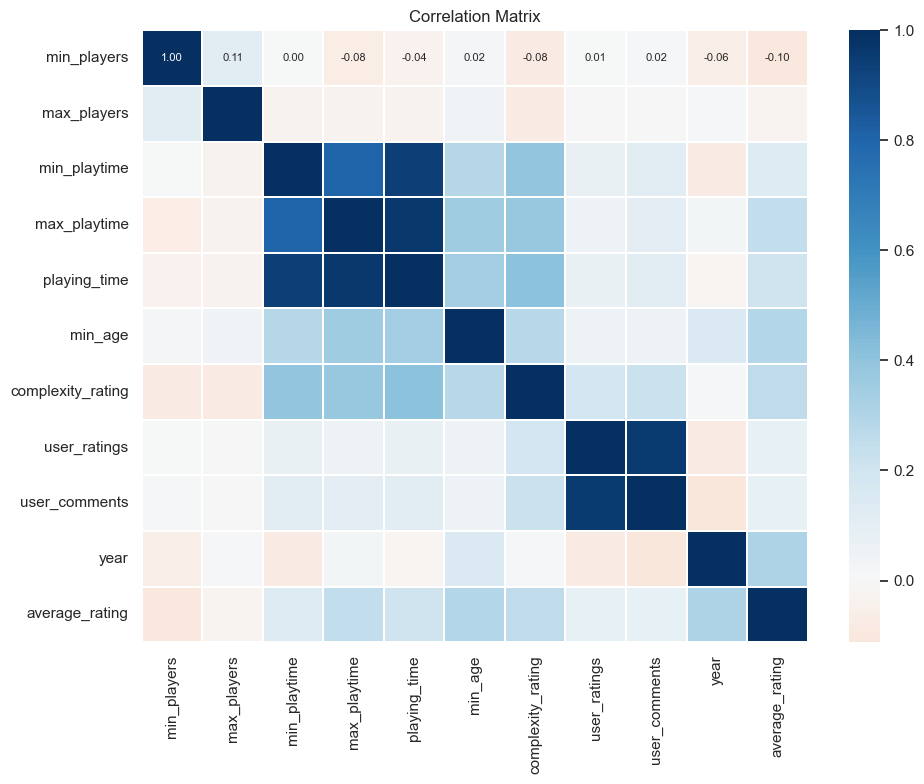

In [195]:
# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0, ax=ax, annot=True, fmt='.2f', linewidths=0.05, annot_kws={'size':8})
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* The analyzed correlation matrix reveals valuable insights into how playing time relates to key game features:

  1. **Strongest correlation:** Playing time and max_playtime (0.8). Longer maximum playtime suggests a longer average playing time, likely due to increased gameplay complexity.

  2. **Other significant correlations:**
      
      * Complexity_rating (0.6): Higher complexity games tend to have longer playing times, requiring more learning and playing time.
        
      * Min_players (0.4): Games with more minimum players often have longer playing times due to increased turn duration and player interaction.
        
      * Min_age (0.2): Games with higher minimum ages generally have longer playing times, potentially targeting older players who prefer more complex games.

  3. **Weak/negative correlations:**
       * User_ratings (0.2): Longer games don't necessarily have higher user ratings, indicating that players value other factors like fun, replayability, and social interaction.
</div>



<a id="1.2"></a>
<h2 style=" font-family: Arial; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00CC99; padding: 15px;  border-bottom: 2px solid blue;
"><b>Making </b> question

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>🔎 Question 1:</font></h3>

1. **A possible question is:** Which board games have the highest number of user ratings?

2. **Answering this question will** help us to identify successful titles and trends, guide publishers in making decisions about game development, marketing strategies, and resource allocation. It can also help them identify potential licensing or collaboration opportunities with popular game creators.

3. **How we answer this question**: we will consider which game has the highest average ratings, its category, complexity, playing time and name.
  
</div>


In [196]:
highest_num_ratings = pd.DataFrame()

highest_num_ratings = cleaned_df.sort_values('user_ratings', ascending=False).loc[:, ['name', 'category', 'user_ratings']]
highest_num_ratings.head()

,name,category,user_ratings
18990,Onitama,Abstract Strategy,21000
2727,Catan: Seafarers,Civilization,19000
3737,Crokinole,Action / Dexterity,17000
3273,Scotland Yard,Deduction,17000
0,Samurai,Abstract Strategy,16000


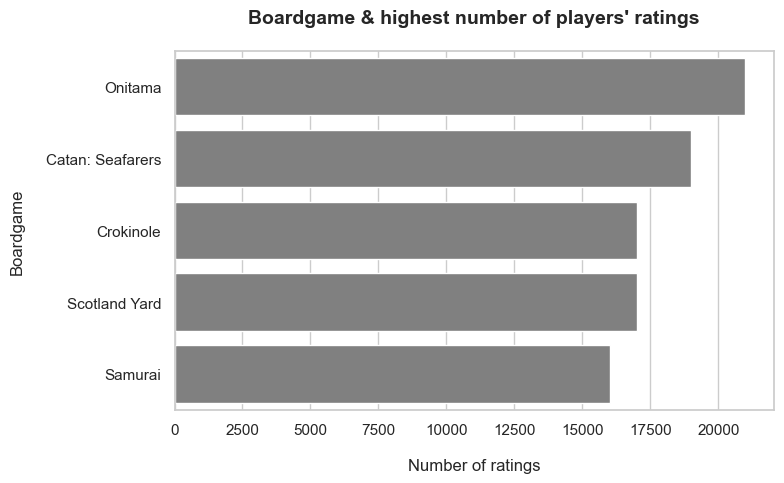

In [197]:
plt.figure(figsize=(8, 5))

# sns.set(style="whitegrid")
ax = sns.barplot(data=highest_num_ratings.head(5), y="name", x= "user_ratings", orient='horizontal', color='grey')
plt.title('Boardgame & highest number of players\' ratings', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Number of ratings', fontsize=12, labelpad=15)
plt.ylabel('Boardgame', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* It is apparently that `Onitama` has the most number of players' ratings, at 22k ratings, which means that it is rated by a lot of people. The number of ratings will indicate the number of players has experienced this game so that the developer of this game can improve the game experience from players'ratings. 

* Additionally, `Catan: Seafarers` is followed by `Onitama`, which is less very little than `Onitama` in term of player's ratings, is the second most common board game, at approximately 18k ratings. Moreover, they are `Crokinole` and `Scotland Yard` which are less than `atan: Seafarers` about 10k ratings. Finally, `Samurai`, which is the lowest number of ratings of board game among 5 games, is about 16k ratings.
  
</div>


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>🔎 Question 2:</font></h3>

1. **A positive question is:** What average time does it take to finish boardgames which has the highest number of players' rating?

2. **Answering this question will** help us to manage player expectations and plan game sessions. It helps players choose games that fit their available time and allows publishers to market games effectively based on their expected duration.

3. **How we answer this question**: we will consider the average time consumption of the highest number of player's rating boardgame.
  
</div>


In [198]:
avg_time_cons_df = cleaned_df.sort_values('user_ratings', ascending=False).loc[:, ['name', 'playing_time', 'user_ratings']]
avg_time_cons_df.head()

,name,playing_time,user_ratings
18990,Onitama,17,21000
2727,Catan: Seafarers,90,19000
3737,Crokinole,30,17000
3273,Scotland Yard,45,17000
0,Samurai,45,16000


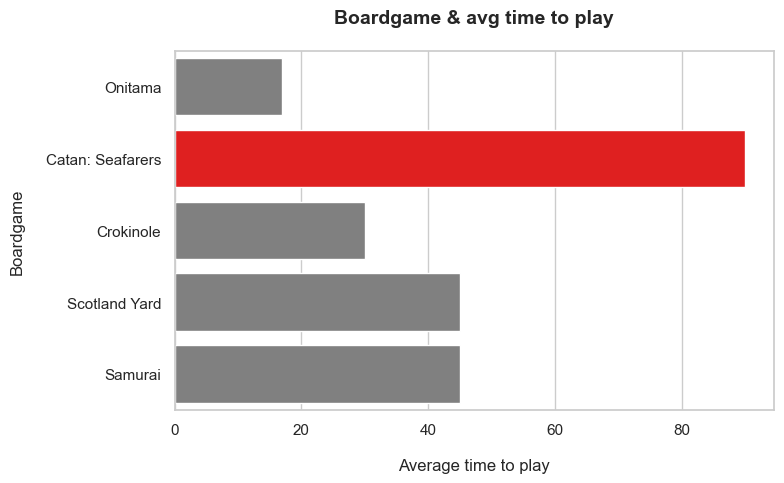

In [199]:
df = avg_time_cons_df.head(5)

fig = plt.figure(figsize=(8, 5))
colors = ['red' if x == df['playing_time'].max() else 'grey' for x in df['playing_time']]
sns.barplot(data=df, y="name", x= "playing_time", orient='horizontal', palette=colors)

plt.title('Boardgame & avg time to play', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Average time to play', fontsize=12, labelpad=15)
plt.ylabel('Boardgame', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* `Catan: Seafarers`, with an average playing time of 90 minutes, stands out as the longest game among the five games. Players engaging in this game should expect to invest a substantial amount of time. `Samurai` and `Scotland Yard`, on the other hand, has an average playing time of 50 minutes. Although shorter than `Catan: Seafarers`, it still requires a considerable time commitment. 

* `Crokinole` offers a relatively shorter playing time of 30 minutes. This makes it a preferable option for players who desire a quicker gaming experience. Lastly, `Onitama` offers the shortest playing time among the five games, averaging at only 18 minutes. This makes it an ideal choice for players who prefer shorter, more compact gameplay sessions. Players can engage in multiple rounds of Coup within a relatively short period.
  
</div>


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>🔎 Question 3:</font></h3>

1. **A positive question is:** Are there any correlations between the player age group and the complexity rating of board games?

2. **Answering this question will** help developers to create games that align with the cognitive abilities and preferences of specific age groups, enabling them to design engaging and enjoyable experiences and help publishers to tailor their marketing strategies and messaging to effectively reach and engage different age groups. By staying informed about the correlation, the industry can adapt to market trends, innovate, and create games that resonate with players of all ages.

3. **How we answer this question**: we will consider the relation between age group and complexity based on correlogram graph and draw a line that show the linear relationship between them.
  
</div>


In [200]:
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1, 1)))
    return X, y.reshape(-1, 1)

In [201]:
df_copy = cleaned_df.loc[(cleaned_df['min_age'] >= 5) & (cleaned_df['min_age'] <= 20), :]
x, y = np.array(df_copy.loc[:, 'min_age']), np.array(df_copy.loc[:, 'complexity_rating'])
X, y = preprocess(x, y)
lr = OLSLinearRegression().fit(X, y)
y_pred = lr.predict(X)

In [202]:
model = smf.ols(formula='complexity_rating ~ min_age', data=df_copy)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      complexity_rating   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     395.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           6.46e-85
Time:                        14:51:07   Log-Likelihood:                -6394.3
No. Observations:                5322   AIC:                         1.279e+04
Df Residuals:                    5320   BIC:                         1.281e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7426      0.044     16.701      0.0

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* The regression analysis reveals valuable insights into the factors influencing complexity_rating. The intercept (0.7426) represents the baseline complexity_rating when min_age is zero, though its practical significance may vary. The coefficient for min_age (0.0833) indicates that, for each additional year, complexity_rating is expected to increase by 0.0833 units.

* Significantly low p-values for both coefficients (p < 0.000) underscore their statistical importance. This suggests a robust relationship between min_age and complexity_rating. However, it's important to note that the overall model, as indicated by the R-squared value (6.9%), explains only a limited portion of complexity_rating variability. Analysts may consider exploring additional variables or more sophisticated models to enhance predictive accuracy.
  
</div>


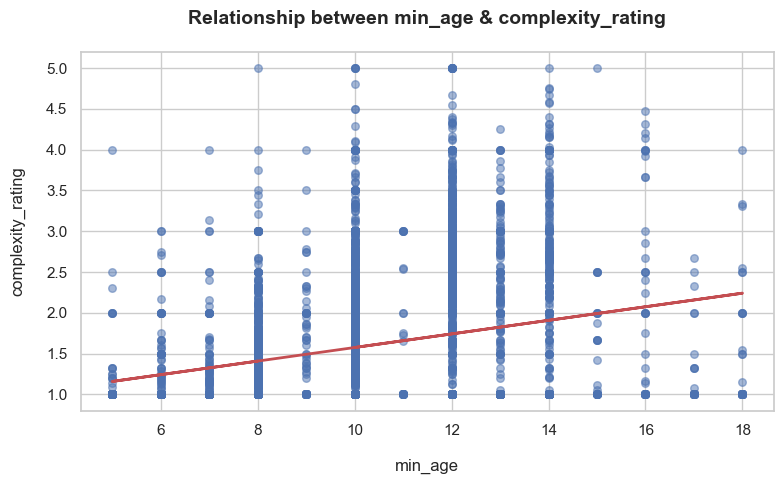

In [203]:
fig = plt.figure(figsize=(8, 5))

plt.scatter(x, y, color='b', marker='o', s=30, alpha=0.5)
plt.plot(x, y_pred, color = 'r', linewidth=2)

plt.title('Relationship between min_age & complexity_rating', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('min_age', fontsize=12, labelpad=15)
plt.ylabel('complexity_rating', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* This scatter show us that there is noting relationship between 2 these variables. So that, age group to play board game is not related to complexity of the board game. In more specific, at each age group, the complexity of board game is equally distributed from 1 to 5.
  
</div>


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>🔎 Question 4:</font></h3>

1. **A positive question is:** Which board games have the highest number of user reviews?

2. **Answering this question will** help the industry gauge player interest, assess market trends, and make informed decisions about game development, marketing strategies, and future investments.

3. **How we answer this question**: we will consider the number of players' comments in the data.
  
</div>


In [204]:
avg_num_review = cleaned_df.sort_values('user_comments', ascending=False).loc[:, ['name', 'user_comments']]
avg_num_review.head()

,name,user_comments
0,Samurai,4000
3952,The Princes of Florence,4000
2727,Catan: Seafarers,3900
3273,Scotland Yard,3800
11120,Alien Frontiers,3700


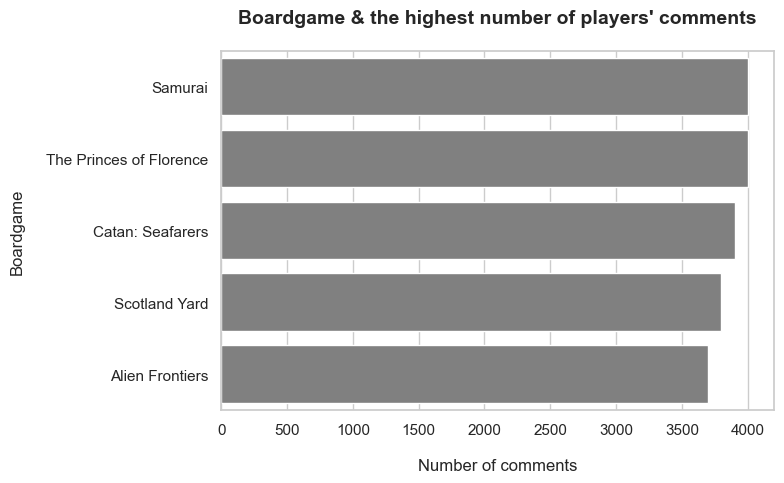

In [205]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_num_review.head(5), y="name", x= "user_comments", orient='horizontal', color='grey')

plt.title('Boardgame & the highest number of players\' comments', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Number of comments', fontsize=12, labelpad=15)
plt.ylabel('Boardgame', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* It is apparently that `Samurai`together with `The Princes of Florence` has the most number of players' comments, at 4k comments, which means that this game is very wellknown and it is reviewed by a lot of people. The comments maybe about the good of this game or maybe some feedback to improve the game experience from players. 

* Additionally, `Catan: Seafarers` in term of player's comments are the second most common board games, at approximately 3.8k comments which is followed by `Scotland Yard`, and `Alien Frontiers` which are different very little from `Catan: Seafarers`, at nearly 3.7k and 3.6k comments respectively. Finally, we can see that top 5 board game with the highest number of comments are nearly the same.
  
</div>


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>🔎 Question 5:</font></h3>

1. **A positive question is:** Is there a relationship between the number of user comments and the average number of users' rating of a board game?

2. **Answering this question will** provides insights into the relationship between user comments and average ratings, offering valuable information for publishers, designers, and the board game industry as a whole to understand player engagement, assess game quality, and make informed decisions regarding marketing strategies and product development. 

3. **How we answer this question**: we will consider the relation between players' ratings and players' comments based on correlogram graph and draw a line that show the linear relationship between them.
  
</div>


In [206]:
x, y = np.array(cleaned_df.loc[:, 'user_ratings']), np.array(cleaned_df.loc[:, 'user_comments'])
X, y = preprocess(x, y)
lr = OLSLinearRegression().fit(X, y)
y_pred = lr.predict(X)

In [207]:
model = smf.ols(formula='user_comments ~ user_ratings', data=cleaned_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          user_comments   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 6.549e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:51:08   Log-Likelihood:                -32300.
No. Observations:                5540   AIC:                         6.460e+04
Df Residuals:                    5538   BIC:                         6.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.1005      1.136     13.293   

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

<p style="margin: 0;">

* The regression model reveals a robust relationship between user_ratings and user_comments. For each additional unit increase in user_ratings, there is an average increase of 0.2388 units in user_comments. The model explains a significant portion of the variability in user_comments, with an R-squared of 92.2%. The F-statistic (6.549e+04, p < 0.001) confirms the overall statistical significance. However, caution is advised due to potential multicollinearity, as indicated by the large condition number (1.25e+03). Further examination of model assumptions is recommended.

</p>
</div>


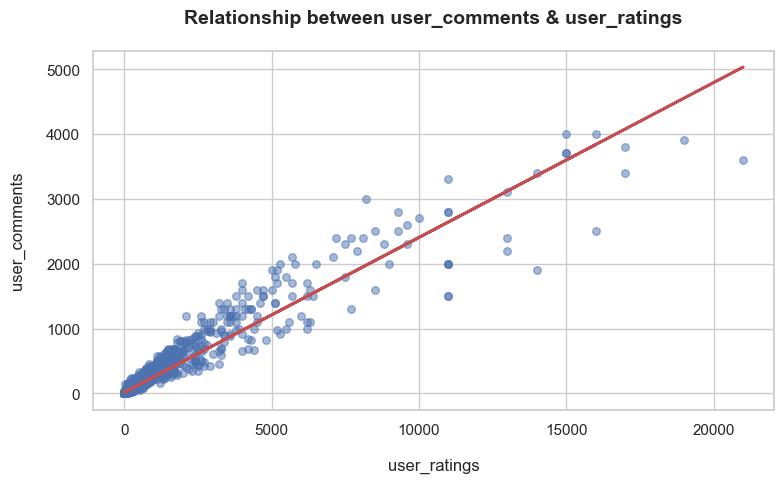

In [208]:
fig = plt.figure(figsize=(8, 5))

plt.scatter(x, y, color='b', marker='o', s=30, alpha=0.5)
plt.plot(x, y_pred, color = 'r', linewidth=2)

plt.title('Relationship between user_comments & user_ratings', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('user_ratings', fontsize=12, labelpad=15)
plt.ylabel('user_comments', fontsize=12, labelpad=15)

plt.tight_layout()
plt.show()


<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* As we can see that the number of players'comments and ratings are nearly linear, and its correlorated efficient is positive. Moreover, the slope of the line is quite large  which means it is a direct proportion when a component increases then the latter will also increase with a very big volume. In another ways, that means if a player rare a board game they will absolutely comment about this board game.
  
</div>


In [209]:
model_2 = smf.ols(formula='user_comments ~ user_ratings + complexity_rating', data=cleaned_df)
results = model_2.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          user_comments   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 3.387e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:51:08   Log-Likelihood:                -32213.
No. Observations:                5540   AIC:                         6.443e+04
Df Residuals:                    5537   BIC:                         6.445e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -12.4053      2.35

<div style="font-size:14px; font-family:Verdana; border-radius:10px; border: #4E5672 solid; padding: 15px; background-color: #CCFFCC; text-align:left; color: #4E5672">


<h3 align="left"><font color='#4E5672'>💡 Comment:</font></h3>

* Both models have high R-squared values, indicating a strong explanatory power of the predictors on user_comments.

* The F-statistic remains significant in both models, suggesting that the overall models are statistically significant.

* In Model 2, the addition of complexity_rating as a predictor provides additional information. The coefficient for complexity_rating is 17.8304, indicating a substantial positive effect on user_comments.

* However, it's important to note that the interpretation of complexity_rating's coefficient should consider the specific context of your data.
  
</div>
